In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs, make_moons
from sklearn import datasets

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
data = pd.read_csv('datasets/data_1024.csv', header=0, delimiter='\t')

# Fazer clusterização hierárquica (HC) usando os seguintes métodos e mostrando os dendrogramas para:

    Single
    Complete
    Average

In [3]:
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
X = data.iloc[:, 1:].values
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [5]:
df = pd.DataFrame(X, columns=[ 'X1', 'X2' ])
df.head()

,X1,X2
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


## Single

In [6]:
hc_single = linkage(X, method="single")
df_single = pd.DataFrame(hc_single, columns = ['idx1', 'idx2', 'dist', 'sample_count'])
df_single.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0


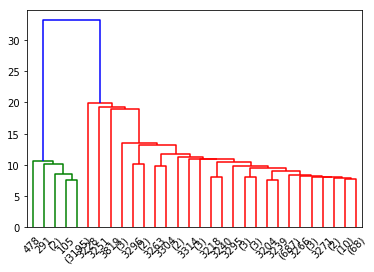

In [7]:
dendrogram(hc_single, truncate_mode='lastp')
plt.show()

## Average

In [8]:
hc_avg = linkage(X, method="average")
df_avg = pd.DataFrame(hc_avg, columns = ['idx1', 'idx2', 'dist', 'sample_count'])
df_avg.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,1055.0,1870.0,0.0,2.0
2,1190.0,1913.0,0.0,2.0
3,1375.0,2417.0,0.0,2.0
4,1372.0,1924.0,0.0,2.0


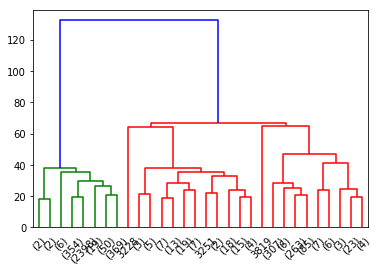

In [9]:
dendrogram(hc_avg, truncate_mode='lastp')
plt.show()

## Complete

In [10]:
hc_complete = linkage(X, method="complete")
df_complete = pd.DataFrame(hc_complete, columns = ['idx1', 'idx2', 'dist', 'sample_count'])
df_complete.head()

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,58.0,897.0,0.0,2.0
2,111.0,1650.0,0.0,2.0
3,1128.0,3038.0,0.0,2.0
4,887.0,2371.0,0.0,2.0


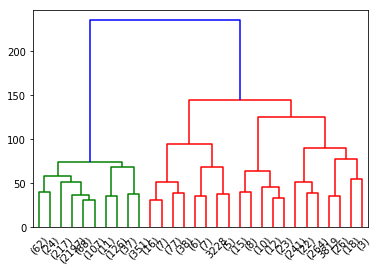

In [12]:
dendrogram(hc_complete, truncate_mode='lastp')
plt.show()

# Escolher uma clusterização hierárquica do item 1 e, a partir dela, escolher uma linha de corte e mostrar os clusters no gráfico.

In [13]:
cut_tree(hc_single)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [   2,    2,    2, ...,    0,    0,    0],
       ...,
       [3997, 3996, 3995, ...,    1,    1,    0],
       [3998, 3997, 3996, ...,    1,    1,    0],
       [3999, 3998, 3997, ...,    1,    1,    0]])

# Fazer clusterização DBSCAN com diferentes valores de eps e minPoints.

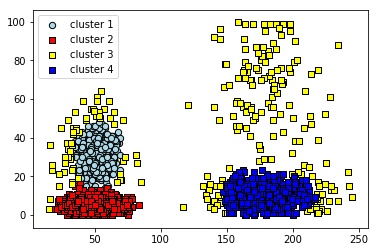

In [17]:
db_1 = DBSCAN(eps=5, min_samples=20, metric='euclidean')
y_db_1 = db_1.fit_predict(X)
plt.scatter(X[y_db_1 == 0, 0], X[y_db_1 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_1 == 1, 0], X[y_db_1 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

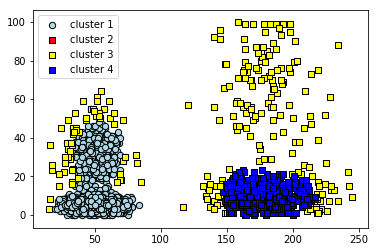

In [19]:
db_2 = DBSCAN(eps=5, min_samples=5, metric='euclidean')
y_db_2 = db_2.fit_predict(X)
plt.scatter(X[y_db_2 == 0, 0], X[y_db_2 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_2 == 1, 0], X[y_db_2 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

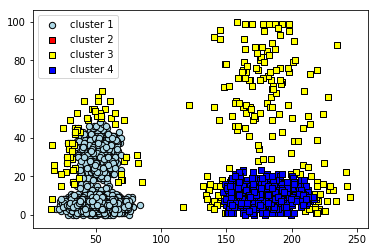

In [20]:
db_3 = DBSCAN(eps=5, min_samples=10, metric='euclidean')
y_db_3 = db_3.fit_predict(X)
plt.scatter(X[y_db_3 == 0, 0], X[y_db_3 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_3 == 1, 0], X[y_db_3 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

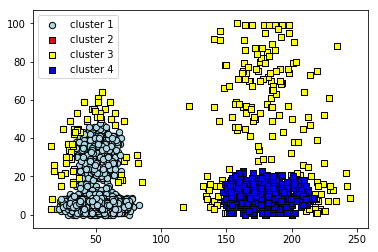

In [21]:
db_4 = DBSCAN(eps=10, min_samples=10, metric='euclidean')
y_db_4 = db_4.fit_predict(X)
plt.scatter(X[y_db_4 == 0, 0], X[y_db_4 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_4 == 1, 0], X[y_db_4 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

# Quais as diferenças entre feature selection e feature extraction

    Feature selection é a técnica para escolher quais features são utéis para o modelo e quais não são e assim eliminá-las.
    
    Feature extraction é transformar uma feature bruta em algo um pouco mais especifico

# Dê exemplos de técnicas usadas para feature selection.

    Regressão Linear, Decision Tree, etc.

# Dê exemplos de técnicas usadas para feature extraction.

    Redução de dimensionalidade multifatorial, redução de dimensionalidade não linear, etc.

# Use o iris dataset e a partir dele:
    
    Reduza a dimensionalidade para 2 dimensões usando PCA, e mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente.


In [24]:
X2, y = datasets.load_iris(return_X_y=True)

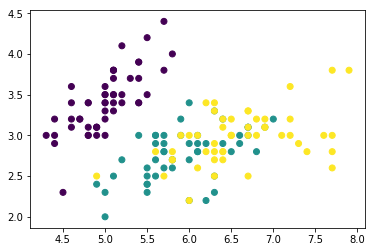

In [25]:
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.show()

In [27]:
#PCA
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X2))

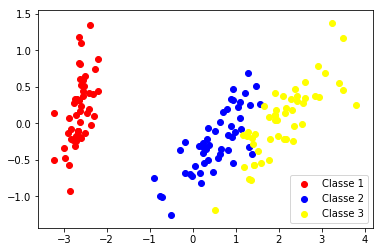

In [28]:
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Classe 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Classe 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Classe 3', c='yellow')

plt.legend()
plt.show()

### Reduza a dimensionalidade para 2 dimensões usando LDA, e mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente.

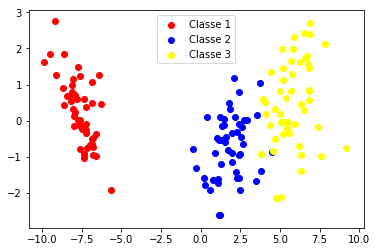

In [30]:
lda = LDA(n_components=2)
lda_transformed = pd.DataFrame(lda.fit_transform(X2, y))

plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Classe 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Classe 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Classe 3', c='yellow')

plt.legend()
plt.show()